<a href="https://colab.research.google.com/github/Kelvyh/ML2023-KelvyHallyson/blob/main/Lista%2002%20-%20Crimes/MDIPcrimes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Dataset: http://www.ssp.sp.gov.br/transparenciassp/Consulta.aspx

In [ ]:
data = pd.read_excel("MDIP_2013_2023.xlsx", sheet_name="2019")

Excluindo dados duplicados

In [ ]:
data = data.drop_duplicates()

Excluindo colunas menos significativas para a nossa análise.

In [ ]:
data = data.drop(['DEPARTAMENTO_CIRCUNSCRICAO',
       'ANO ESTATISTICA',
       'ANO_BO', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO',
       'LATITUDE', 'LONGITUDE',
       'DATA_NASCIMENTO_PESSOA','TIPO_PESSOA', 'PROFISSAO', 'NATUREZA_APURADA'], axis=1)

Selecionando os dados somente de São Paulo.

In [ ]:
values = data[~data['MUNICIPIO_CIRCUNSCRICAO'].isin(["S.PAULO"])].index
newindexes = list(range(0, 325))
data = data.drop(values).reset_index().drop(labels='index',axis=1)

Convertendo para tipos apropriados.

In [ ]:
data = data.convert_dtypes()

Transformando strings para lowercase.

In [ ]:
data = data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

Preenchendo valores NaN.

In [ ]:
values = {"NUMERO_LOGRADOURO": -1, "IDADE_PESSOA": -1}
data = data.fillna(value=values)

In [ ]:
data = data.convert_dtypes()

Plotagem dos dados para análise.

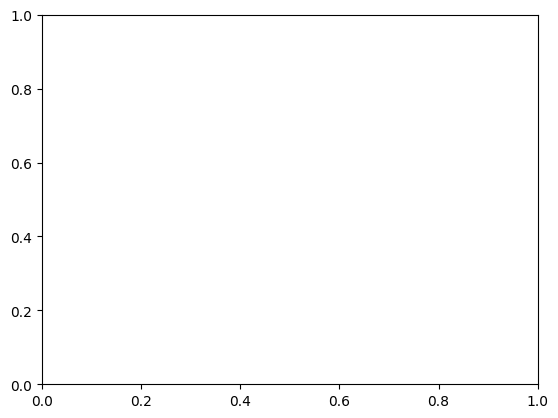

In [ ]:
fig, ax = plt.subplots()

Cor da Pele das vítimas de MDIP, podemos ver uma maior quantidade da cor parda.

In [ ]:
data['COR_PELE'].value_counts().sort_values(ascending=False).plot(kind='barh', ax=ax)
ax.set_xlabel("QUANTIDADE")
ax.set_ylabel("COR DA PELE")
plt.show()

![Cor%20da%20pele.png](attachment:Cor%20da%20pele.png)

Corporação dos policiais da MDIP, podemos ver que é bem mais comum uma intervenção da policia militar resultar em morte.

In [ ]:
data['COORPORAÇÃO'].value_counts().sort_values(ascending=False).plot(kind='barh', ax=ax)
ax.set_xlabel("QUANTIDADE")
ax.set_ylabel("COORPORAÇÃO")
plt.show()

![Corpora%C3%A7%C3%A3o.png](attachment:Corpora%C3%A7%C3%A3o.png)

Local da ocorrência da MDIP, podemos ver que a maioria dos casos ocorrem em vias públicas.

In [ ]:
data['DESC_TIPOLOCAL'].value_counts().sort_values(ascending=False).plot(kind='barh', ax=ax)
ax.set_xlabel("QUANTIDADE")
ax.set_ylabel("LOCAL")
plt.show()

![Local.png](attachment:Local.png)

Sexo das vítimas da MDIP, podemos ver que a grande maioria das vítimas são do sexo masculino.

In [ ]:
data['SEXO_PESSOA'].value_counts().sort_values(ascending=False).plot(kind='barh', ax=ax)
ax.set_xlabel("QUANTIDADE")
ax.set_ylabel("SEXO")
plt.show()

![Sexo.png](attachment:Sexo.png)

Situação dos policias no ato da MDIP, podemos ver que a maioria dos casos ocorrem em serviço, porém, um considerável número ocorre durante folgas.

In [ ]:
data['SITUAÇÃO'].value_counts().sort_values(ascending=False).plot(kind='barh', ax=ax)
ax.set_xlabel("QUANTIDADE")
ax.set_ylabel("SITUAÇÃO")
plt.show()

![Situa%C3%A7%C3%A3o.png](attachment:Situa%C3%A7%C3%A3o.png)